In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
import hvplot.pandas

In [ ]:
json_url = 'http://127.0.0.1:5000/cardiovascular_data'
clean_treat_df = pd.read_json(json_url)
clean_treat_df.head()

In [52]:
clean_treat_df = pd.read_csv('Resources/cardio_data_processed.csv')
clean_treat_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [53]:
bins =[0,20,40,65,100]
labels = ['0-20', '20-40', '40-65', '65-100']
clean_treat_df['age'] = pd.cut((clean_treat_df['age']/365),bins=bins, labels=labels, right=False)



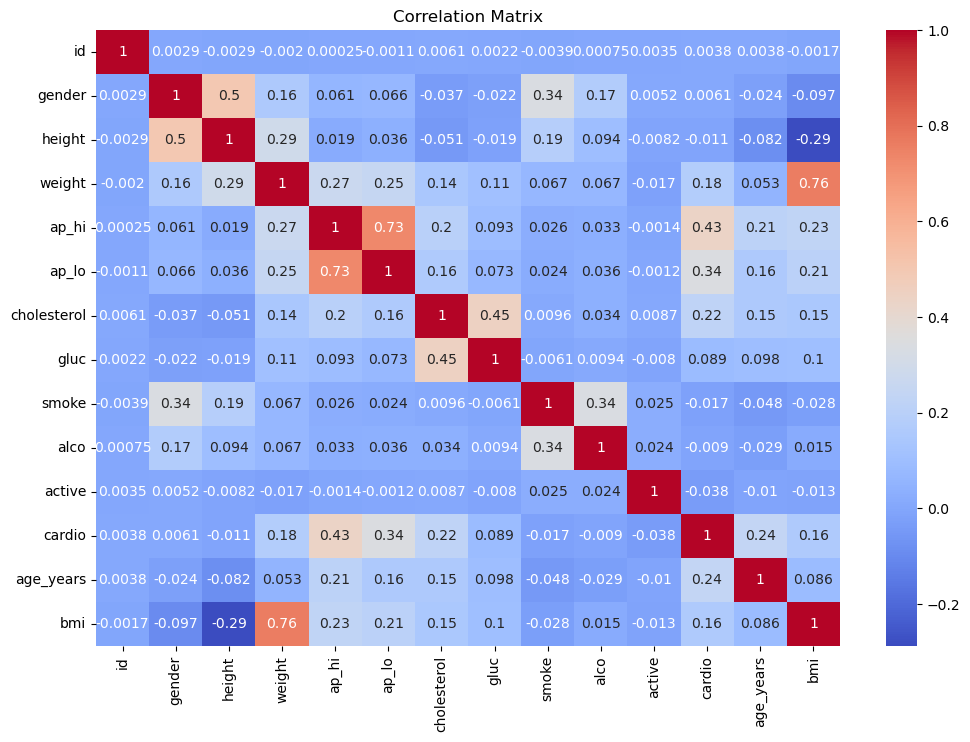

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlation between numerical features
numeric_data = clean_treat_df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [54]:
sample_group_clean_df = clean_treat_df.drop(['age_years', 'id', 'alco', 'gender', 'height', 'smoke', 'active', 'bp_category'], axis=1)
sample_group_clean_df.head(10)


,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,bmi,bp_category_encoded
0,40-65,62.0,110,80,1,1,0,21.967120,Hypertension Stage 1
1,40-65,85.0,140,90,3,1,1,34.927679,Hypertension Stage 2
2,40-65,64.0,130,70,3,1,1,23.507805,Hypertension Stage 1
3,40-65,82.0,150,100,1,1,1,28.710479,Hypertension Stage 2
4,40-65,56.0,100,60,1,1,0,23.011177,Normal
5,40-65,67.0,120,80,2,2,0,29.384676,Hypertension Stage 1
6,40-65,93.0,130,80,3,1,0,37.729725,Hypertension Stage 1
7,40-65,95.0,130,90,3,3,1,29.983588,Hypertension Stage 1
8,40-65,71.0,110,70,1,1,0,28.440955,Normal
9,40-65,68.0,110,60,1,1,0,25.282570,Normal


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder

data_cleaned = sample_group_clean_df

X = data_cleaned.drop("cardio", axis=1)
y = data_cleaned["cardio"]


num_cols = X.select_dtypes(include=["float64", "int64"]).columns

cat_cols = X.select_dtypes(include=["object"]).columns
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 3: Encode categorical variables
# Convert categorical features into dummy variables
encoder = OneHotEncoder(drop="first", handle_unknown='ignore', sparse_output=False)
encoded_train_data_df = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]), columns = encoder.get_feature_names_out())

encoded_test_data_df = pd.DataFrame(encoder.transform(X_test[cat_cols]), columns = encoder.get_feature_names_out())
encoded_test_data_df

,bp_category_encoded_Hypertension Stage 1,bp_category_encoded_Hypertension Stage 2,bp_category_encoded_Normal
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13636,1.0,0.0,0.0
13637,1.0,0.0,0.0
13638,0.0,1.0,0.0
13639,1.0,0.0,0.0


In [56]:
# Step 4: Feature scaling
# Normalize numerical features to a standard scale
scaler = StandardScaler()
scaled_train_data_df = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns = X_train[num_cols].columns)
scaled_test_data_df = pd.DataFrame(scaler.transform(X_test[num_cols]), columns = X_train[num_cols].columns)



In [49]:
final_clean_train_df = pd.concat([encoded_train_data_df, scaled_train_data_df], axis=1)
final_clean_test_df = pd.concat([encoded_test_data_df, scaled_test_data_df], axis=1)

In [61]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 7: Train the Random Forest Regressor
rf_model = LogisticRegression()
rf_model.fit(final_clean_train_df, y_train)


y_pred = rf_model.predict(final_clean_test_df)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Step 10: Visualize actual vs predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results_df = results_df.reset_index(drop=True)



0.7179092441903087
[[5704 1258]
 [2590 4089]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6962
           1       0.76      0.61      0.68      6679

    accuracy                           0.72     13641
   macro avg       0.73      0.72      0.71     13641
weighted avg       0.73      0.72      0.71     13641



In [10]:
results_df

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
13636,1,0
13637,1,1
13638,1,1
13639,1,1


In [63]:
# Step 7: Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(final_clean_train_df, y_train)


best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(final_clean_test_df)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Accuracy: 0.7229675243750459
[[5582 1380]
 [2399 4280]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6962
           1       0.76      0.64      0.69      6679

    accuracy                           0.72     13641
   macro avg       0.73      0.72      0.72     13641
weighted avg       0.73      0.72      0.72     13641



AUC Score: 0.77


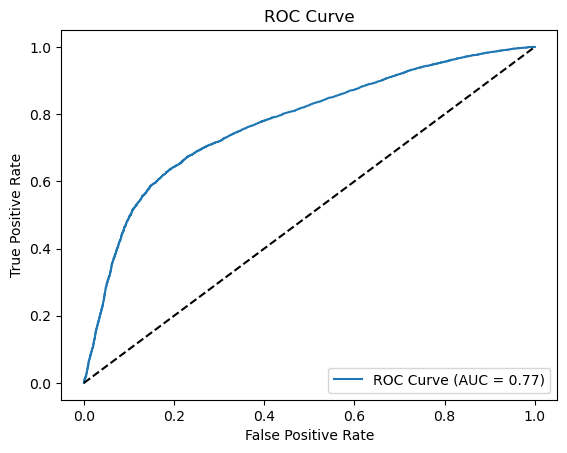

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_rf_model.predict_proba(final_clean_test_df)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc_score:.2f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [65]:
from xgboost import XGBClassifier

rf_model = XGBClassifier(random_state=42)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(final_clean_train_df, y_train)


best_model = grid_search.best_estimator_

print(best_model)
y_pred = best_model.predict(final_clean_test_df)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.7215013562055568
[[5611 1351]
 [2448 4231]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6962
           1       0.76      0

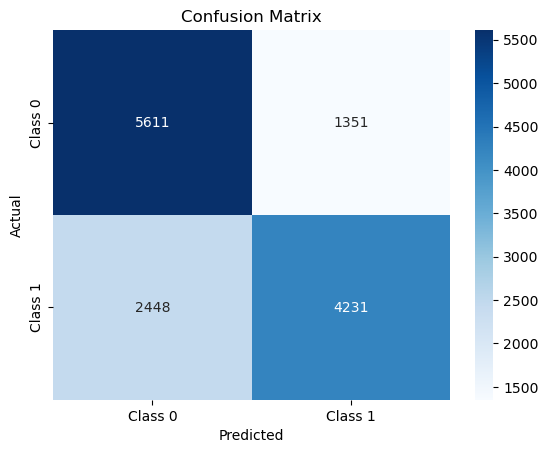

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
results_df

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
13636,1,0
13637,1,1
13638,1,1
13639,1,1


In [ ]:
from sklearn.svm import SVC

rf_model = SVC()
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'kernel':['linear'],
    'degree':[3,5,7,10]
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(final_clean_train_df, y_train)


best_rf_model = grid_search.best_estimator_

print(best_rf_model)
y_pred = best_rf_model.predict(final_clean_test_df)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVC(kernel='linear')
0.7127776555970969
[[5974  988]
 [2930 3749]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      6962
           1       0.79      0.56      0.66      6679

    accuracy                           0.71     13641
   macro avg       0.73      0.71      0.70     13641
weighted avg       0.73      0.71      0.71     13641



In [ ]:
results_df

,Actual,Predicted
0,77.46,78.665868
1,79.98,68.406679
2,71.19,66.619388
3,73.26,67.185103
4,91.85,76.240182
...,...,...
121,97.95,69.173396
122,94.34,74.527467
123,90.25,78.605408
124,68.64,72.070557
